# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

# Input-Output Operations

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'   #导入绘图程序库和定制设置

## Basic I/O with Python

### Writing Objects to Disk

In [2]:
path = './'  # 选择文件路径

In [3]:
import numpy as np
from random import gauss

In [4]:
a = [gauss(1.5, 2) for i in range(1000)]    # 生成正态分布随机数

In [5]:
import pickle

In [6]:
pkl_file = open(path + 'data.pkl', 'wb')   #打开可写文件

In [7]:
%time pickle.dump(a, pkl_file)

Wall time: 0 ns


In [8]:
pkl_file = open(path + 'data.pkl', 'rb')  # 打开只读文件

In [9]:
%time b = pickle.load(pkl_file)

Wall time: 1 ms


In [10]:
b[:5]

[1.4875651660407059,
 -0.02335880486450459,
 8.357820542540978,
 -0.5852199910043692,
 2.4121726621477544]

In [11]:
a[:5]

[1.4875651660407059,
 -0.02335880486450459,
 8.357820542540978,
 -0.5852199910043692,
 2.4121726621477544]

In [12]:
pkl_file.close()

### Reading and Writing Text Files

In [13]:
import pandas as pd

In [14]:
csv_file = open(path + 'data.csv', 'w')  # 打开可写文件

In [15]:
rows = 500 #定义数据集行数
a = np.random.standard_normal((rows, 5)).round(4)  # 创建一个5000行、每行有5个数的正态分布数据，小数后取4位
t = pd.date_range(start='2014/1/1', periods=rows, freq='H') #创建一个间隔为1小时的时间索引对象

In [16]:
header = 'date,no1,no2,no3,no4,no5\n'  #定义标题行（列标签）
csv_file.write(header)

25

In [17]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):      #按行合并数据
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [18]:
csv_file = open(path + 'data.csv', 'r')  # 打开只读文件

In [19]:
for i in range(5):
    print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.220700,-1.588900,1.941200,1.030800,1.678200
2014-01-01 01:00:00,0.023600,-0.796700,-0.773000,2.350400,1.095100
2014-01-01 02:00:00,0.664900,-0.633800,-0.544800,0.449200,0.062200
2014-01-01 03:00:00,-1.227400,1.071100,0.738800,-1.059200,0.709600


In [20]:
csv_file.close()

### Writing and Reading Numpy Arrays

In [21]:
import numpy as np

In [22]:
data = np.random.standard_normal((1000, 6)).round(4)

In [23]:
%time np.save(path + 'array', data)

Wall time: 93.2 ms


In [24]:
%time np.load(path + 'array.npy')

Wall time: 20.5 ms


array([[ 0.3156, -0.4042, -0.7942,  0.8681,  0.3951,  0.6708],
       [-0.5595, -0.7749,  0.6471, -1.8826, -0.2149, -0.188 ],
       [ 1.1746, -0.2097, -0.1066,  1.116 , -1.9191, -0.1066],
       ...,
       [-1.2765, -0.5883,  1.7042, -1.1729,  1.3918, -1.2207],
       [ 1.2753,  0.3355,  0.2257, -0.1358,  0.2224, -1.037 ],
       [ 0.363 , -0.1662,  0.7804, -0.5868, -0.9449,  1.3138]])

In [25]:
data = 0.0

## I/O with pandas

In [35]:
import numpy as np
import pandas as pd
data = np.random.standard_normal((10000, 5)).round(4)
        # sample data set

In [36]:
filename = path + 'numbs'

### Data as CSV File

Wall time: 438 ms


array([[<AxesSubplot:title={'center':'No1'}>,
        <AxesSubplot:title={'center':'No2'}>],
       [<AxesSubplot:title={'center':'No3'}>,
        <AxesSubplot:title={'center':'No4'}>]], dtype=object)

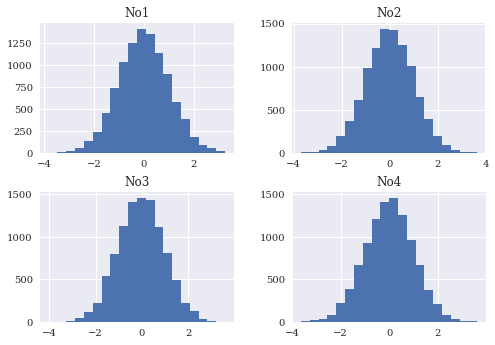

In [40]:
%%time
pd.read_csv(filename + '.csv')[['No1', 'No2',
                                'No3', 'No4']].hist(bins=20);
# tag: data_hist_3
# title: Histogram of 4 data set

### Data as Excel File

Wall time: 2.94 s


<AxesSubplot:>

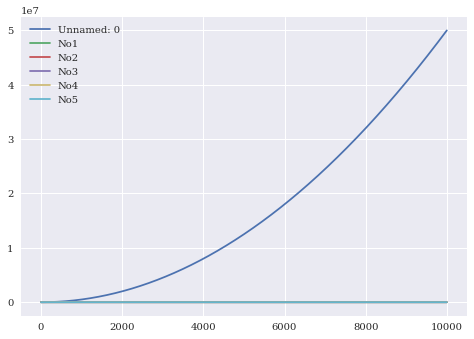

In [42]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()
# tag: data_paths
# title: Paths of random data from Excel file
# size: 60